Código elaborado por Claudiomar Filho para fins didáticos em 01/10/2025

# 📊 Análise de Correlação: Covid-19 e Indicadores Sociais

Durante a pandemia de Covid-19, milhões de vidas foram perdidas ao redor do mundo. Mas será que o número de mortes por milhão de habitantes foi igual em todos os países? Ou será que alguns fatores sociais, econômicos e de saúde pública influenciaram esses números?

1 - Neste notebook, vamos investigar se existe relação entre o número de mortes por milhão e variáveis como:

✅ Porcentagem da população idosa

💰 PIB per capita

🩺 Porcentagem da população com diabetes

🗳️ Índice de democracia

⚖️ Índice de Gini (desigualdade de renda)

2 - Para isso, utilizaremos o conceito de correlação — uma ferramenta estatística que mede a força e a direção da relação entre duas variáveis.
Quando duas variáveis estão correlacionadas, isso significa que mudanças em uma delas tendem a estar associadas a mudanças na outra.

Uma correlação positiva indica que, à medida que uma variável aumenta, a outra também tende a aumentar.

Uma correlação negativa indica que, conforme uma variável aumenta, a outra tende a diminuir.

Uma correlação próxima de zero sugere que não há uma relação linear clara entre as variáveis.

3 - Importante lembrar:

Vale destacar que correlação não implica causalidade — ou seja, mesmo que duas variáveis estejam associadas, isso não significa necessariamente que uma causa a outra. A correlação serve como um primeiro passo para investigar possíveis relações, mas não é suficiente para afirmar causalidade.
Ou seja, duas variáveis podem andar juntas, mas isso não quer dizer que uma causa a outra.

4 - 👨‍🏫 O que você vai aprender:

O que é correlação e como interpretá-la

Como calcular a correlação entre variáveis numéricas em Python

Como visualizar graficamente essas relações

Como usar estatística para levantar hipóteses e fazer perguntas relevantes

Tudo isso com códigos simples, passo a passo, para que você aprenda sem complicações.

5 - Para mais exemplos de gráficos de correlação, lembre sempre de consultar o https://python-graph-gallery.com/

In [3]:
# 📦 Importar bibliotecas necessárias
import pandas as pd
#from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 📁 Fazer upload do arquivo manualmente
#uploaded = files.upload()

# 📄 Ler o arquivo Excel (pegando o primeiro nome da lista de arquivos enviados)
#arquivo = list(uploaded.keys())[0]
arquivo = "dados_covid.xlsx"
df = pd.read_excel(arquivo)

# 👀 Exibir as 5 primeiras linhas
df.head()


,Mortes por milhão,Porcentagem da população acima de 70 anos,pib per capita em dólares,Porcentagem da população com diabetes,Índice de democracia,Índice de Gini
0,115.903,18.493,40063.0,5.72,8.13,32.9
1,1034.448,17.366,7359.0,10.08,6.22,36.2
2,2108.769,16.240,33090.0,4.78,7.74,35.9
3,1084.050,15.957,46232.0,8.31,8.67,31.9
4,1675.639,14.924,23350.0,9.85,7.90,33.8



🔍 **O que fizemos acima?**
- Importamos o `pandas`, que é uma biblioteca para análise de dados.
- Lemos o arquivo `dados_covid.xlsx` usando `read_excel()`.
- Exibimos as 5 primeiras linhas com `df.head()` para visualizar os dados.


In [4]:
# 📈 Calcular a correlação entre as variáveis

# O método .corr() calcula a correlação entre colunas numéricas do DataFrame.
# Ao usar numeric_only=True, garantimos que apenas as colunas com valores numéricos (ex: float64, int64)
# sejam consideradas no cálculo da correlação.

# Isso evita erros ou resultados inesperados, já que colunas do tipo "object" (como nomes de países ou regiões)
# não podem ter correlação calculada com variáveis numéricas.

df.corr(numeric_only=True)


,Mortes por milhão,Porcentagem da população acima de 70 anos,pib per capita em dólares,Porcentagem da população com diabetes,Índice de democracia,Índice de Gini
Mortes por milhão,1.000000,0.539746,0.233117,-0.009268,0.435734,-0.133629
Porcentagem da população acima de 70 anos,0.539746,1.000000,0.572824,-0.084729,0.679115,-0.456975
pib per capita em dólares,0.233117,0.572824,1.000000,0.023557,0.568515,-0.315239
Porcentagem da população com diabetes,-0.009268,-0.084729,0.023557,1.000000,-0.069693,0.035581
Índice de democracia,0.435734,0.679115,0.568515,-0.069693,1.000000,-0.203924
Índice de Gini,-0.133629,-0.456975,-0.315239,0.035581,-0.203924,1.000000


In [5]:

# 🔍 Ver correlação da variável alvo ("Mortes por milhão") com as demais
df.corr(numeric_only=True)["Mortes por milhão"].sort_values(ascending=False)

Mortes por milhão                            1.000000
Porcentagem da população acima de 70 anos    0.539746
Índice de democracia                         0.435734
pib per capita em dólares                    0.233117
Porcentagem da população com diabetes       -0.009268
Índice de Gini                              -0.133629
Name: Mortes por milhão, dtype: float64


🔢 **O que significa esse resultado?**
- A função `.corr()` calcula a **correlação de Pearson** entre todas as colunas numéricas.
- A correlação varia de **-1 (correlação negativa perfeita)** a **+1 (correlação positiva perfeita)**.
- Valores próximos de 0 indicam **baixa correlação**.



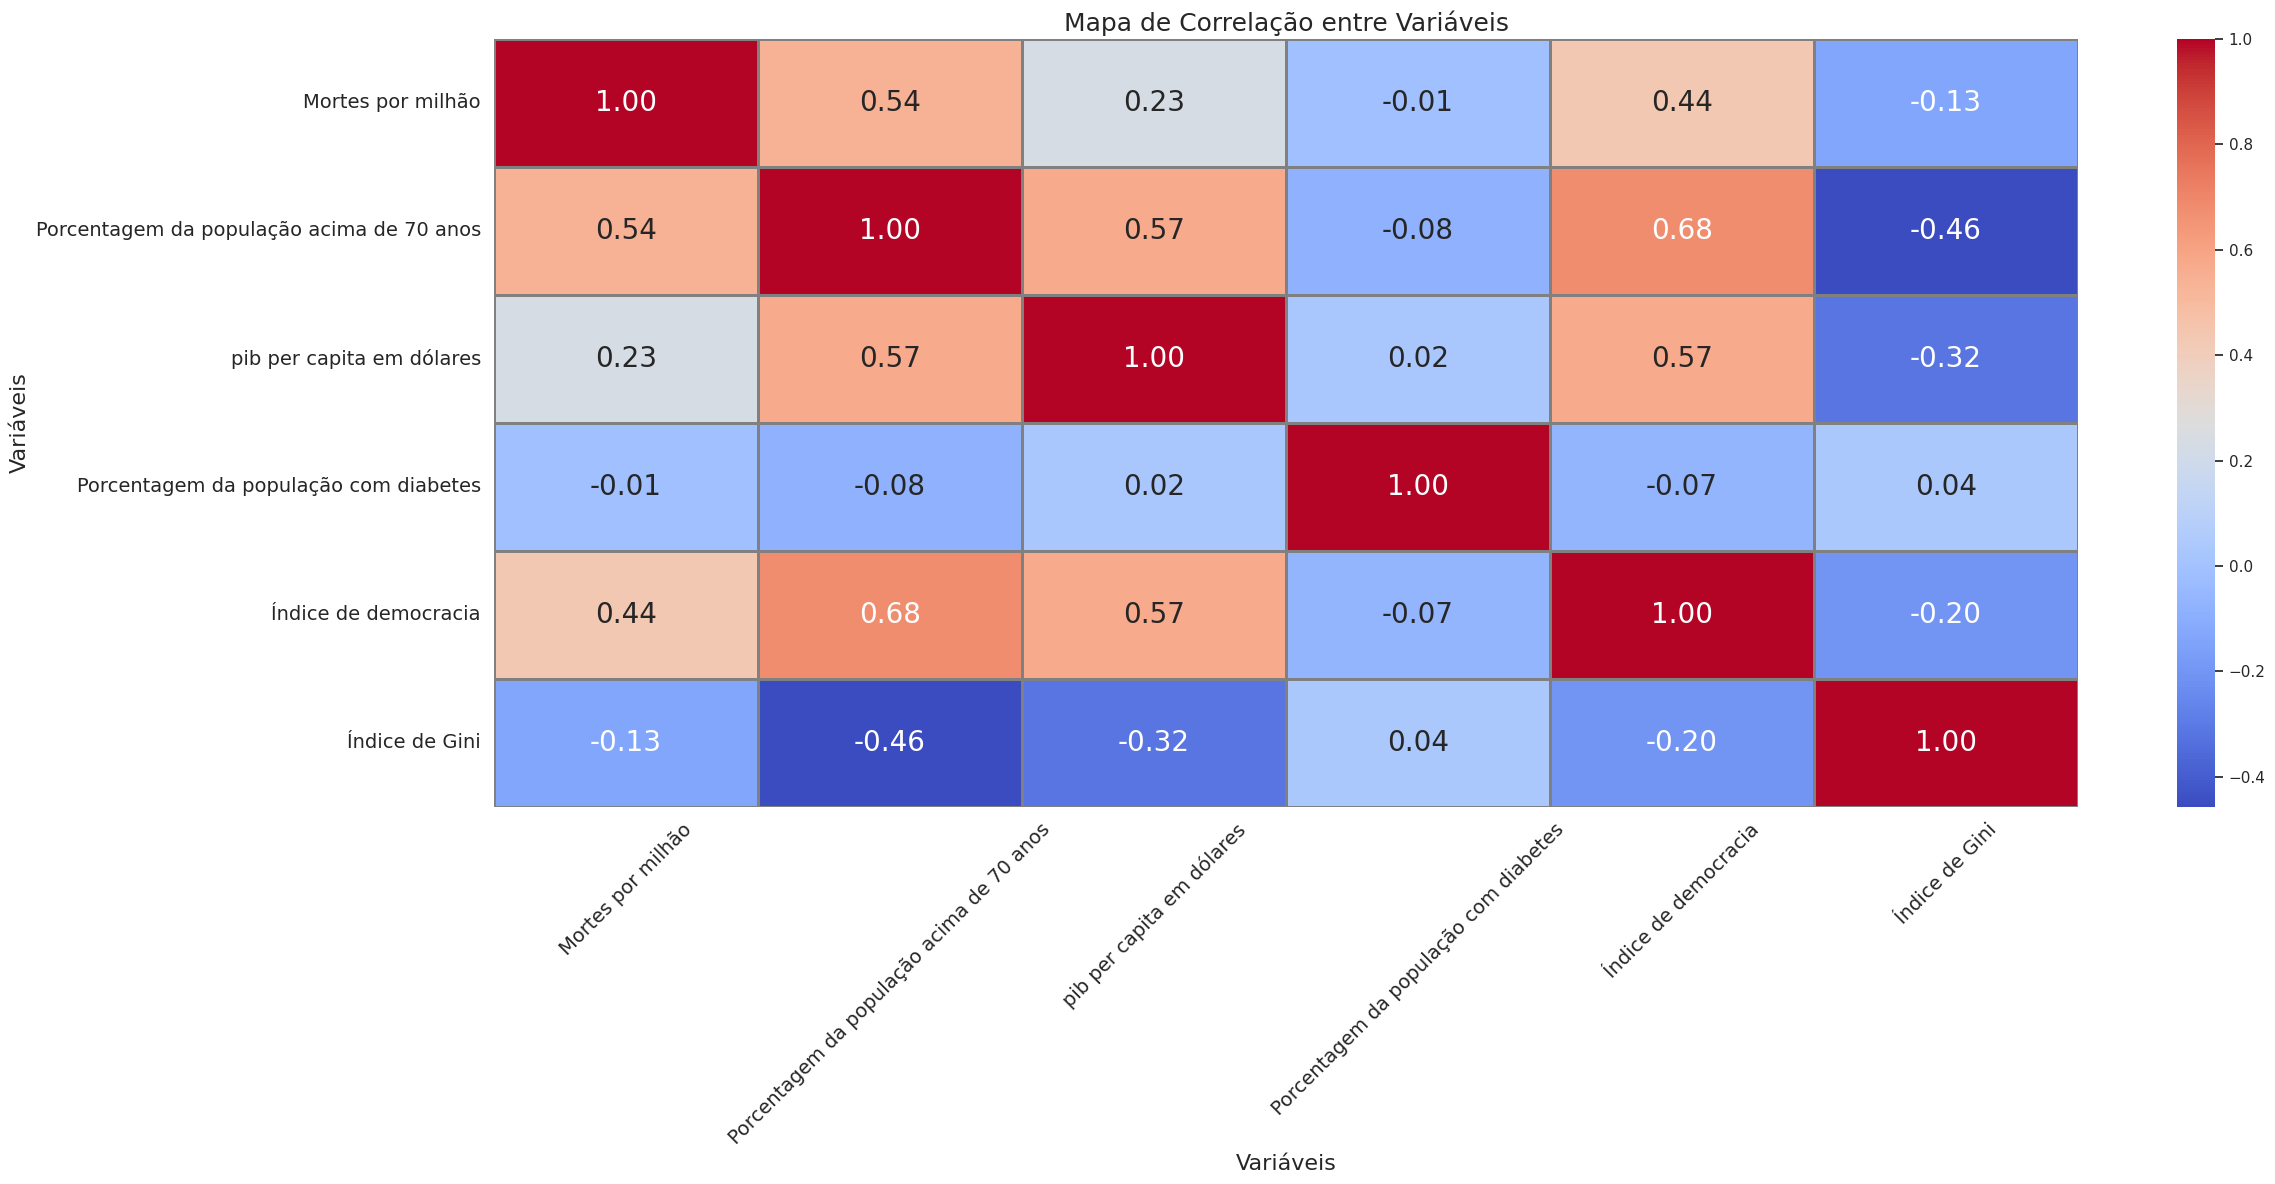

In [6]:
# 🔍 Calcular a matriz de correlação (apenas colunas numéricas)
# Calcula a correlação entre todas as colunas numéricas do DataFrame `df`
# O parâmetro numeric_only=True garante que colunas do tipo texto (como nomes de países) sejam ignoradas
matriz_correlacao = df.corr(numeric_only=True)

# 🎨 Configurar o estilo dos gráficos
# Define o estilo visual padrão dos gráficos do Seaborn para deixar com aparência mais limpa e agradável
sns.set(style="whitegrid")

# 🗺️ Criar mapa de calor
# Define o tamanho da figura do gráfico (largura=25, altura=12)
plt.figure(figsize=(25, 12))

# Cria o heatmap com a matriz de correlação
# `annot=True` exibe os valores numéricos dentro dos quadrados
# `fmt=".2f"` formata os valores para 2 casas decimais
# `cmap="coolwarm"` define a paleta de cores que vai de azul (correlação negativa) a vermelho (positiva)
# `linewidths=1` e `linecolor="gray"` adicionam linhas cinzas entre os quadrados para melhorar a leitura
# annot_kws define o estilo do texto das anotações (valores exibidos nas células), neste caso, "size": 20 aumenta o tamanho da fonte dos números
sns.heatmap(
    matriz_correlacao,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1,
    linecolor="gray",
    annot_kws={"size": 20}
)

# Define o título do gráfico
plt.title("Mapa de Correlação entre Variáveis", fontsize=18)        # Título maior
plt.xlabel("Variáveis", fontsize=16)                                # Legenda do eixo X
plt.ylabel("Variáveis", fontsize=16)                                # Legenda do eixo Y
plt.xticks(rotation=45, fontsize=14)                                # Rótulos do eixo X
plt.yticks(rotation=0, fontsize=14)                                 # Rótulos do eixo Y

# Rotaciona os rótulos do eixo X para 45 graus para evitar sobreposição
plt.xticks(rotation=45)

# Mantém os rótulos do eixo Y na posição original (sem rotação)
plt.yticks(rotation=0)

# Ajusta automaticamente o layout para não cortar nada no gráfico
plt.tight_layout()

# Exibe o gráfico
plt.show()


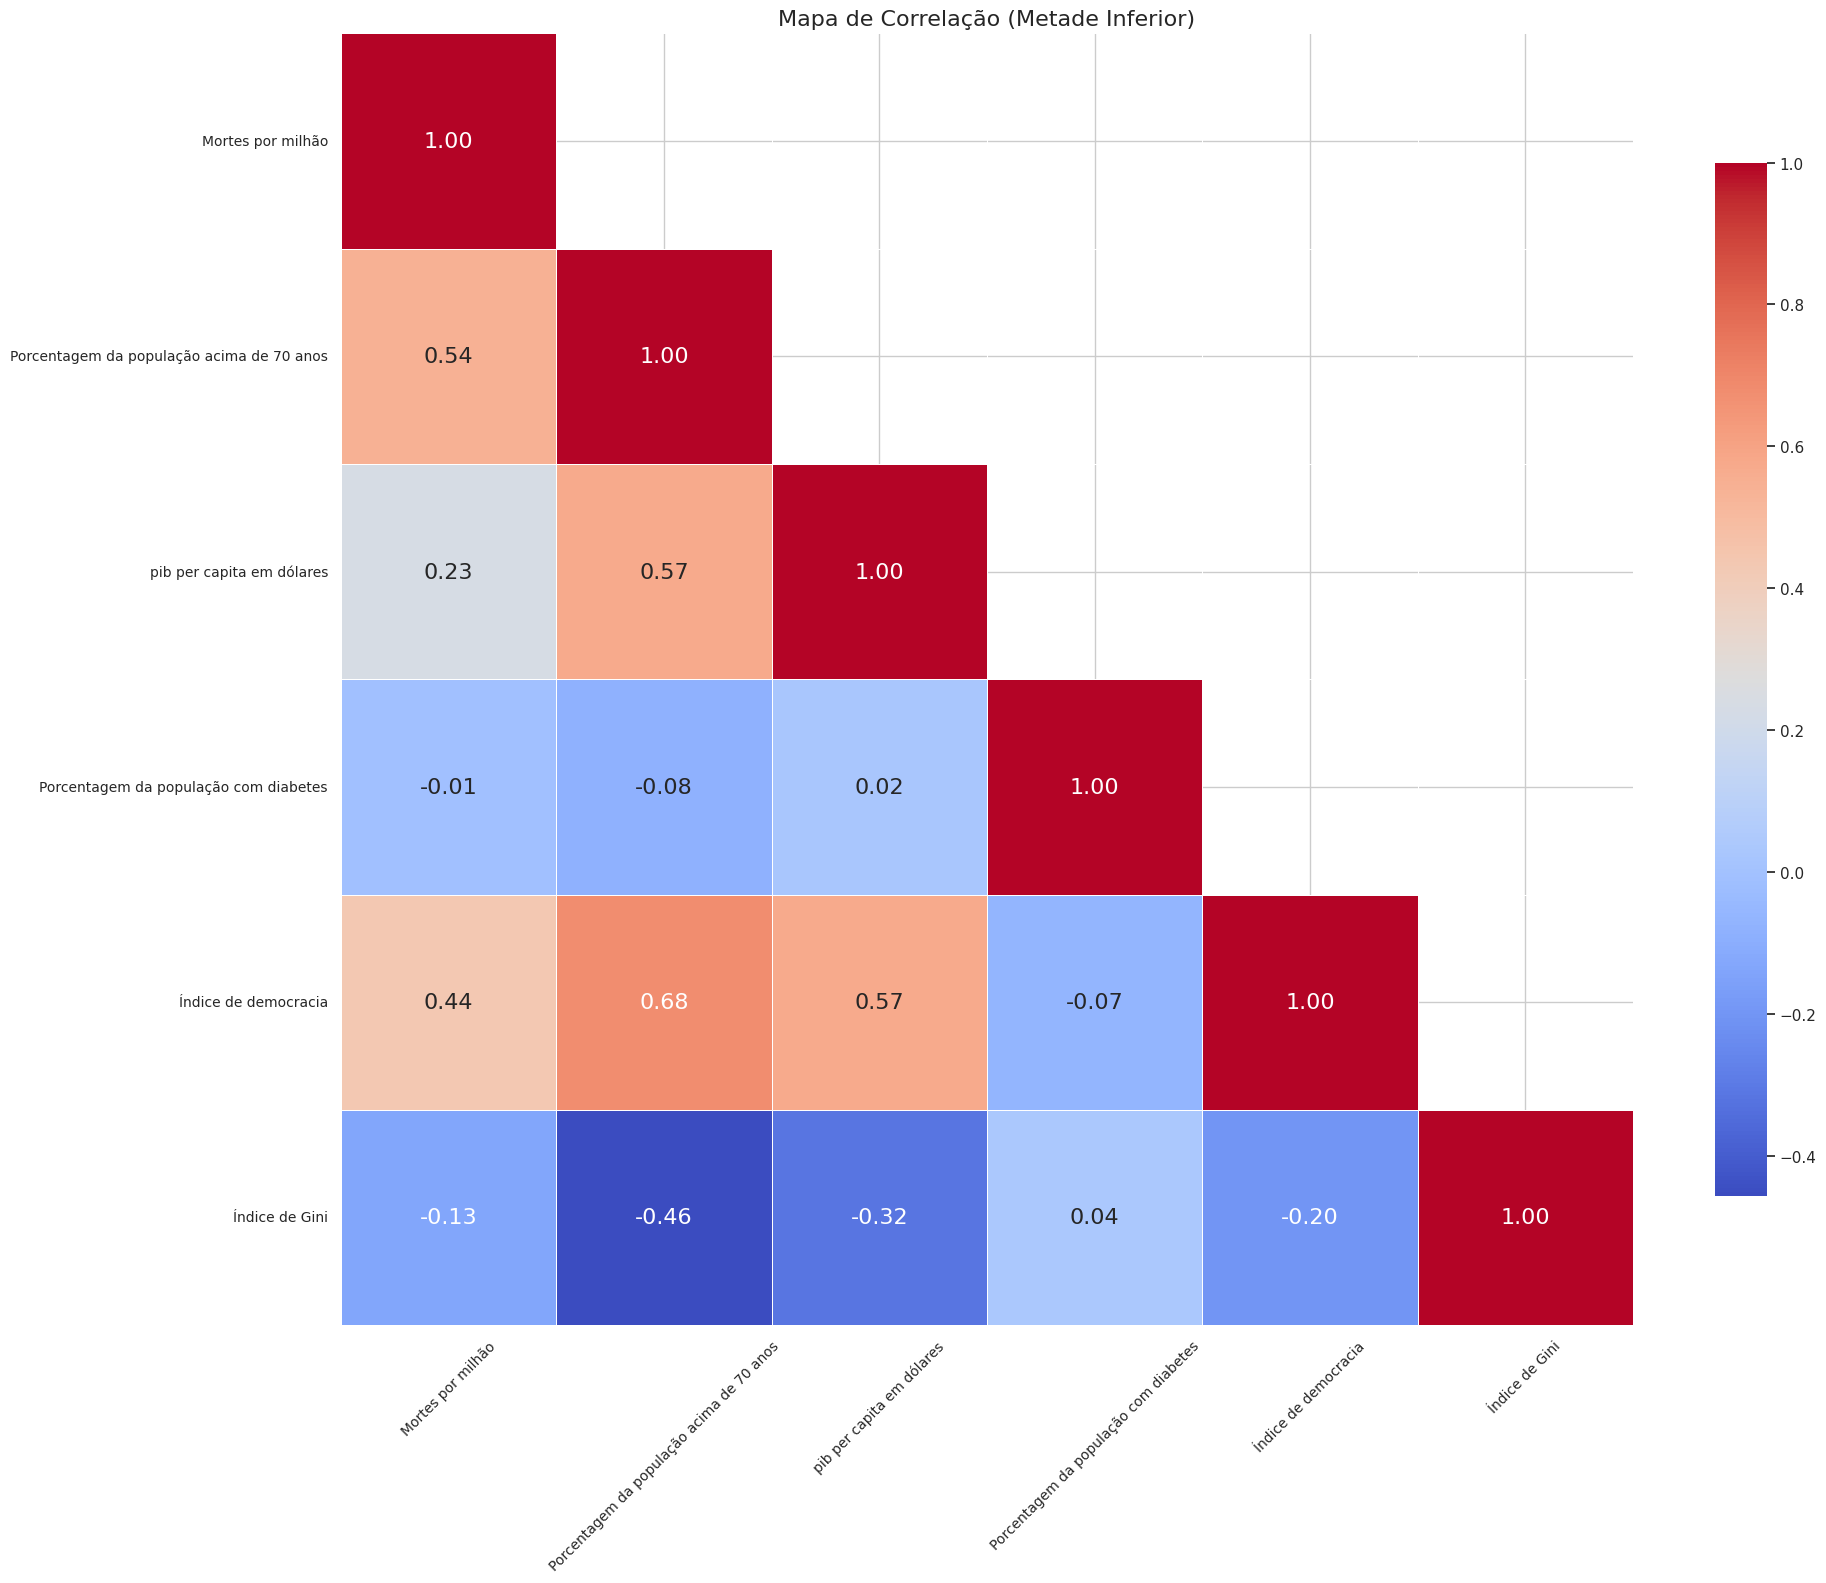

In [7]:
# 🔢 Calcular a matriz de correlação apenas para colunas numéricas
matriz_correlacao = df.corr(numeric_only=True)

# 🎭 Criar a máscara para ocultar a metade superior (exclui a diagonal) e deixar apenas a metade inferior
mask = np.triu(np.ones(matriz_correlacao.shape), k=1)
# Cria uma matriz do mesmo tamanho da matriz de correlação, só com o número 1 em todas as posições
# Ex.: se a matriz for 6x6 → teremos uma matriz 6x6 só com o número 1
# Depois, usamos np.triu(...) para transformar essa matriz em uma "máscara triangular":
# - Os valores da parte de cima da diagonal ficam como 1 (esses quadrados serão escondidos no gráfico)
# - Os valores da parte de baixo ficam como 0 (esses quadrados serão mostrados no gráfico)
# O argumento k=1 faz com que a própria diagonal principal também seja marcada como 0 (ou seja, também mostrada)

# 📐 Criar a figura e definir o tamanho do gráfico
plt.figure(figsize=(20, 16))

# 🔥 Gerar o mapa de calor (heatmap)
sns.heatmap(
    matriz_correlacao,
    mask=mask,                     # aplicar a máscara
    annot=True,                    # mostrar valores
    fmt=".2f",                     # duas casas decimais
    cmap="coolwarm",              # cores
    linewidths=0.5,               # linhas internas
    linecolor="white",            # cor das linhas
    square=True,                  # quadrados perfeitos
    cbar_kws={"shrink": 0.8},     # barra lateral
    annot_kws={"fontsize": 16}    # fonte dos números
)


# 📌 Ajustes visuais
plt.title("Mapa de Correlação (Metade Inferior)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


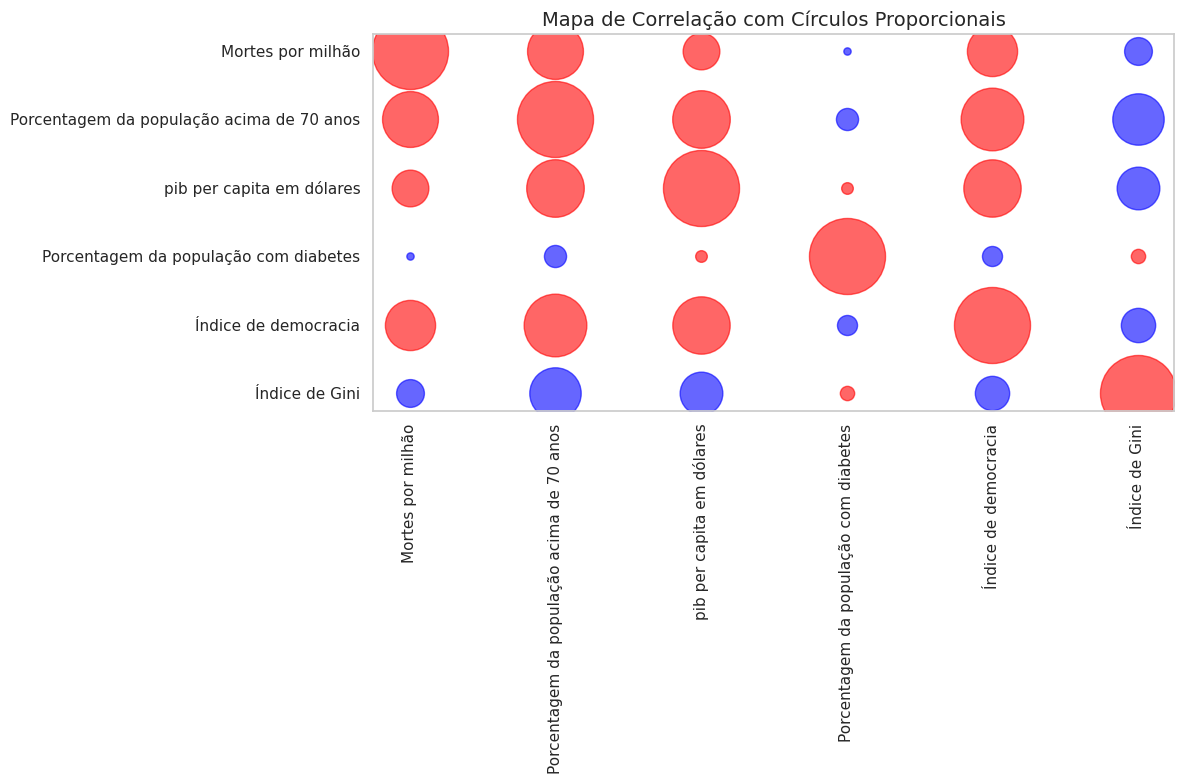

In [8]:
# 📐 Criar nova figura com tamanho personalizado
plt.figure(figsize=(12, 8))

# 🎯 Percorrer cada combinação de variáveis (linhas e colunas)
for i in range(len(matriz_correlacao.columns)):
    for j in range(len(matriz_correlacao.columns)):
        coef = matriz_correlacao.iloc[i, j]        # pega o valor da correlação
        cor = "red" if coef > 0 else "blue"        # cor vermelha para positiva, azul para negativa
        tamanho = abs(coef) * 3000                 # tamanho do círculo proporcional à força da correlação
        plt.scatter(j, i, s=tamanho, c=cor, alpha=0.6)  # desenha o círculo

# 🏷️ Configurar rótulos dos eixos
plt.xticks(ticks=np.arange(len(matriz_correlacao.columns)), labels=matriz_correlacao.columns, rotation=90)
plt.yticks(ticks=np.arange(len(matriz_correlacao.columns)), labels=matriz_correlacao.columns)

# 🎨 Título e estética
plt.title("Mapa de Correlação com Círculos Proporcionais", fontsize=14)
plt.grid(False)
plt.gca().invert_yaxis()  # inverte o eixo Y para parecer uma matriz
plt.tight_layout()
plt.show()



---
## ✅ Conclusão

Com poucas linhas de código, conseguimos descobrir **quais variáveis têm relação com as mortes por Covid-19**.

Agora você pode testar outras bases e investigar relações entre variáveis com `df.corr()`.

📚 **Dica final**: Correlação não é causalidade. Sempre investigue com senso crítico!
